# Day 3 Project Challenge - Chipseq data & functions

In this exercise, we will explore a CHIPseq binding site dataset consisting of three wild-type (WT) samples and three knockout (KO) samples.

The dataset contains abundance values at binding sites, which represent the level of binding intensity for each genomic region. By examining the differences in binding site abundance, we can gain insights into the impact of the knockout on the binding patterns and potentially identify key regulatory elements affected by the knockout.

The objective of this exercise is to analyze and compare the abundance traces between the WT and KO samples. We are going to be repeating steps so putting your code into functions will be really helpful (although technically not essential). And we will start by reading in a bespoke dataset from a file.

**Note:** Although the context is ChiPseq you are not required to have any knowledge of that as the data used here is the same as any longitudinal data. While we are talking here about CHiPSeq the data format could apply to any set of x/y coordinates.

We have three columns. Sample ID, a genomic coordinate (distance from our site of interest) and an abundance.

Samples: ```WT01```, ```WT02```, ```WT03```, ```KO01```,```KO02```,```KO03```


| Sample |  Coordinate (x)  |  Abundance (y) |
|--------|--------------|-------------|
|  WT01  |    -5.0      |     0.4     |
|  WT01  |    -4.0      |     0.6     |
|  WT01  |    -3.0      |     0.9     |
|  ...  |    ...      |     ...     |
|  KO01  |     6.5      |    -0.2     |
|  KO01  |     3.8      |     0.2     |
|  KO01  |     3.4      |     0.6     |
|  ...  |     ...      |     ...     |


If we were to plot one sample, it should look like this:

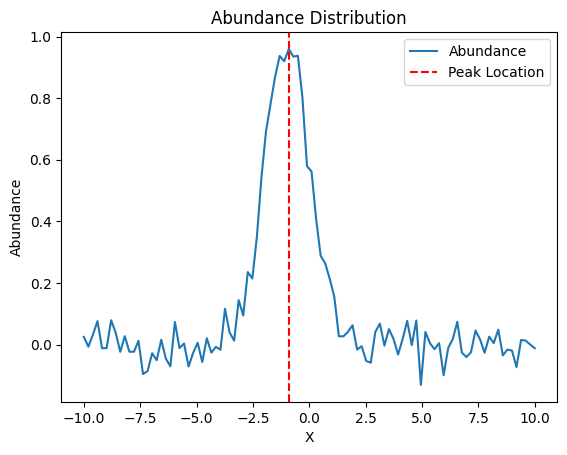

## Objectives
1. **Extension:** Read in the data file to create a ```Sample : (X coords, abundance)``` dictionary.
    - When adding to a dictionary that may or may not already contain your key it's imporant to test it exists first.
    - When reading in numbers, python won't automatically assume they are integers/floats and not strings!
    
---
<details>
<summary>If you want to skip the reading data step to get to the functions, copy this code</summary>

```
with open("/content/Day3-project-binding_data.sgr") as inFile:
    for line in inFile:
        # Assign the three columns to IDs
        ID, x, y = line.split()

        # Create an empty 2D list if it doesn't exist for this ID yet
        if ID not in data_dict:
            data_dict[ID] = [[],[]]

        # Append the X and Y co-ordinates - remember to force them to be numerical values!
        data_dict[ID][0].append(float(x))
        data_dict[ID][1].append(float(y))

```

</details>

---

2. Create a function ```find_peak()``` to find and return the position of the highest abundance value point of a dataset.
3. Create a function ```plot_abundance()``` to plot the data for a sample. Use parameters to assign the Sample name as the title.
4. Use the output from ```find_peak()``` to plot the position of the peak into your abundance graph using ```plt.axvline```
5. Loop through all 6 sample datasets outputting the graph and peak position.

6. **Extension:** Read the region.fasta file. This corresponds to this region (each X unit = 10bp so it is 1000bp long). Create a functon that takes the region_sequence and the output of ```find_peak()``` and prints the 50bp region around the peak position.


Tips:
- Don't forget that you need the index of the peak_position for slicing the region_sequence (not the x_coord). Perhaps go back and for ```find_peak()``` output a tuple with ```(peak_x_coord, peak_index)``` which you can use.

## Load your data

In [2]:
## Reading in the binding data file
data_dict = {}

# read the file and crate a dictionary using column 1 as the key and x,y as the values
with open("/content/Day3-project-binding_data.sgr") as inFile:
    for line in inFile:
        # Assign the three columns to IDs
        ID, x, y = line.split()

        # Create an empty 2D list if it doesn't exist for this ID yet
        if ID not in data_dict:
            data_dict[ID] = [[],[]]

        # Append the X and Y co-ordinates - remember to force them to be numerical values!
        data_dict[ID][0].append(float(x))
        data_dict[ID][1].append(float(y))

with open("/content/Day3-Project-region.fasta") as regionFile:
    for line in regionFile:
        if not line.startswith('>'):
            region_sequence = line

In [ ]:
# Test with just one sampe
import matplotlib.pyplot as plt

x, y = data_dict.get("WT01")

plt.plot(x, y)
plt.show()

## Define your functions

In [ ]:
def find_peak():
  ........


In [ ]:
def plot_abun():
    ......

In [ ]:
def get_peak_sequence():
    ......

## Run your analyses


highest: 6.565656565656564 1.0738418069231421


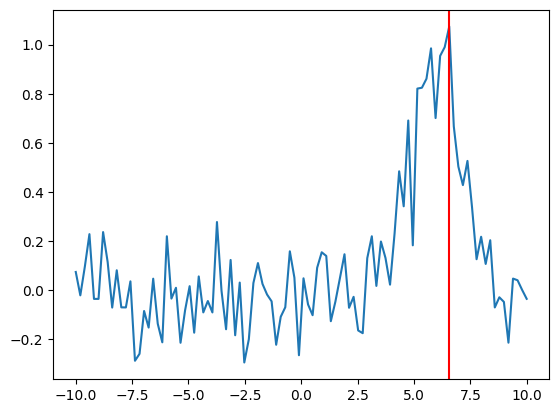

In [31]:
# Test with one sample, then loop through all 6 samples

#for sample, coord in data_dict.items():
#  print(sample, coord[0][:5], coord[1][:5])

pos, abun = data_dict.get("KO03")

index = 0
highest_abun = float("-Inf")
highest_pos = float("-Inf")

while index < len(pos):

  if highest_abun < abun[index]:
    highest_abun = abun[index]
    highest_pos = pos[index]

  index += 1

print("highest:", highest_pos, highest_abun)


# Test with just one sampe
import matplotlib.pyplot as plt

plt.plot(pos, abun)
plt.axvline(highest_pos, color="red")
plt.show()